In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

# RNN으로 IMDB 리뷰 감성분석

**[핵심키워드]**  말뭉치,  토큰,  원-핫 인코딩,  단어임베딩

- 영화 리뷰 데이터셋에 적용하여 리뷰를 긍정과 부정으로 분류

### 텍스트 데이터 다루기

- 텍스트 
  - 가장 흔한 시퀀스 형태 데이터: 단어의 시퀀스, 문자의 시퀀스
  

- 자연어처리를 위한 딥러닝
  - 문서분류, 감성분석, 저작식별, (제한된 범위의)질문 응답 등
  - 단어, 문장, 문단에 적용한 패턴 인식
  - 텍스트를 수치형 텐서로 변환해야 함(텍스트 벡터화)

- 토큰(token) : 텍스트를 단어, 문자, n-그램으로 나눈 단위
- 토큰화(tokenization) : 텍스트를 토큰으로 나누는 작업

- 모든 텍스트 벡터화 과정은 토큰화 적용과 생성된 토큰에 수치화 벡터를 연결하는 것으로 주용 방식은 **원-핫-인코딩**과 **토큰 임베딩 방식**이 있음

#### 문자 수준 원-핫 인코딩

In [2]:
# 문자 수준의 원-핫 인코딩 예

import string

samples = ['This cat sat on the mat.', 'The dog ate my homework,']
characters = string.printable   # 출력가능한 모든 아스키문자
print('출력가능한 모든 아스키문자', characters)
print(len(characters))
token_index = dict(zip(characters, range(1, len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[1, j, index] = 1

출력가능한 모든 아스키문자 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

100


#### 케라스의 Tokenizer()를 사용한 단어 수준의 원-핫-인코딩
- tensorflow.keras.preprocessing.text.Tokenizer()
- 특수문자를 제거하거나 빈도가 높은 N개 단어만 선택
- 1-gram BOW와 같음

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['This cat sat on the mat.', 'The dog ate my homework,']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' %len(word_index))

10개의 고유한 토큰을 찾았습니다.


In [4]:
word_index

{'the': 1,
 'this': 2,
 'cat': 3,
 'sat': 4,
 'on': 5,
 'mat': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework': 10}

In [5]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### IMDB 리뷰 데이터셋

In [6]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [7]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [8]:
len(train_input[0])

218

In [9]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


### 1. 데이터 준비

#### 훈련데이터와 검증 데이터 준비

In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [11]:
lengths = np.array([len(x) for x in train_input])

In [12]:
np.min(lengths), np.max(lengths)

(11, 1854)

In [13]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

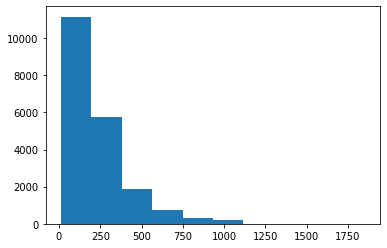

In [14]:
# sample들의 단어수 분포
plt.hist(lengths)
plt.show()

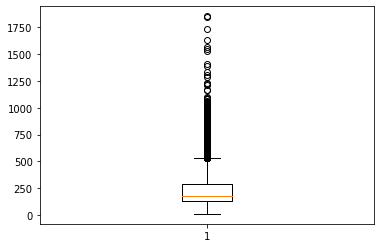

In [15]:
plt.boxplot(lengths) #len, frequency
plt.show()

#### 최대 100개 단어만 사용하는 시퀀스로 준비

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [23]:
train_seq.shape

(20000, 100)

In [24]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [25]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

In [26]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [27]:
val_seq = pad_sequences(val_input, maxlen=100)

#### 원-핫 인코딩

In [33]:
from tensorflow.keras.utils import to_categorical

train_oh = to_categorical(train_seq)

In [34]:
val_oh = to_categorical(val_seq)

#### 모델 생성

In [35]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


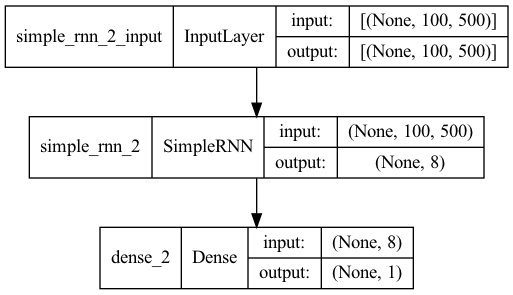

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

#### 모델 훈련

In [38]:
from tensorflow.keras import callbacks, optimizers

rmsprop = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = callbacks.ModelCheckpoint('model/best-simplernn-model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

2022-03-25 10:41:14.274573: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
313/313 [==============================] - 7s 20ms/step - loss: 0.6980 - accuracy: 0.4909 - val_loss: 0.6961 - val_accuracy: 0.4996
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6950 - accuracy: 0.5023 - val_loss: 0.6943 - val_accuracy: 0.5120
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6923 - accuracy: 0.5178 - val_loss: 0.6914 - val_accuracy: 0.5314
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6859 - accuracy: 0.5559 - val_loss: 0.6827 - val_accuracy: 0.5784
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6765 - accuracy: 0.6008 - val_loss: 0.6736 - val_accuracy: 0.6092
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6652 - accuracy: 0.6356 - val_loss: 0.6621 - val_accuracy: 0.6346
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6506 - accuracy: 0.6623 - val_loss: 0.6484 - val_accuracy:

#### 모델 성능 시각화

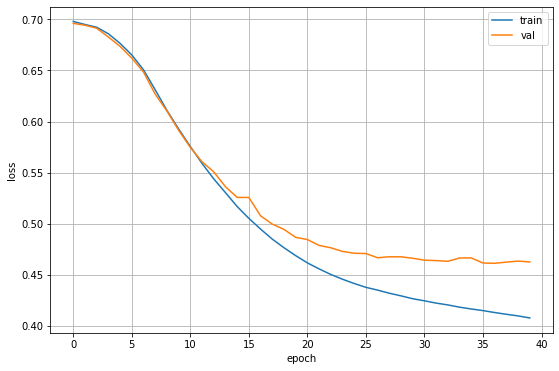

In [39]:
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩 사용

말뭉치(Corpus)
- 자연어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합

밀집 표현(Dense Representation)
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
- 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨  
- 예:   
    강아지 = [0 0 0 1 ......0] # 10,000 차원  
    밀집 표현으로 변경  
    강아지 = [0.2 1.8 1.1 .... ] # 128차원  
    벡터의 차원이 조밀해졌다고 해서 밀집 벡터(dense bector)라고 함  

예 : 단어 happy는 bad 보다 good에 더 가깝고 cat은 good 보다는 dog에 가깝다는 것을 고려하여 배열을 새로운 수치로 변경  

- 밀집 단어 벡터(word vector)를 사용하는 것
- 저차원의 실수형 벡터
  - 참고. 원-핫-인코딩으로 만든 벡터는 희소고차원(어휘 사전에 있는 단어의 수와 차원이 같음)
  - 희소벡터의 반대인 밀집벡터

#### 단어 임베딩을 만드는 두가지 방법  

1. 관심 대상인 문제와 함께 단어 임베딩 학습
2. 사전 훈련된 단어 임베딩 이용

In [40]:
model2 = models.Sequential()

model2.add(layers.Embedding(500, 16, input_length=100))
model2.add(layers.SimpleRNN(8))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [41]:
rmsprop = optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = callbacks.ModelCheckpoint('model/best-embedding-model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6858 - accuracy: 0.5590 - val_loss: 0.6716 - val_accuracy: 0.6298
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6604 - accuracy: 0.6516 - val_loss: 0.6530 - val_accuracy: 0.6674
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6419 - accuracy: 0.6862 - val_loss: 0.6368 - val_accuracy: 0.6848
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6223 - accuracy: 0.7144 - val_loss: 0.6152 - val_accuracy: 0.7240
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6014 - accuracy: 0.7366 - val_loss: 0.5962 - val_accuracy: 0.7390
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5823 - accuracy: 0.7498 - val_loss: 0.5795 - val_accuracy: 0.7460
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5639 - accuracy: 0.7588 - val_loss: 0.5630 - val_accuracy: 0.7566

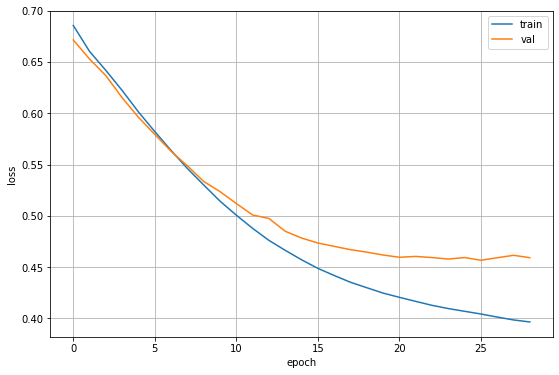

In [42]:
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['train', 'val'])
plt.show()

--- 

### [마무리]

- 말뭉치 : 자연어처리에서 사용하는 텍스트 데이터의 모음. 훈련데이터셋
- 토큰 : 텍스트에서 공백으로 구분되는 문자열. 소문자로 변환, 구둣점 삭제 등
- 원-핫 인코딩 : 어떤 클래스에 해당하는 원소만 1, 나머지는 0인 벡터
- 단어 임베딩 : 정수로 변화된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환
    - 밀집 벡터는 단어 사이의 관계를 표현


### [핵심패키지와 함수]

**TensorFlow**

- pad_sequence() : 시퀀스 길이를 맞추기 위해 패딩 추가, (샘플개수, 타입스텝개수) 크기의 2차원 배열
    - maxlen : 원하는 시퀀스 길이를 지정
        - 이 값보다 긴 시퀀스는 잘리고 짧은 시퀀스는 패딩 됨
        - 이 값을 지정하지 않으면 긴 시퀀스의 길이가 됨
    - padding :패딩을 추가할 위히 지정
        - 기본값은 'pre' : 시퀀스 앞에 패딩 추가
        - 'post' :시퀀스 뒤에 패딩 추가
    - truncating : 긴 시퀀스에서 잘라버릴 위치 지정
        - 기본값은 'pre' : 시퀀스 앞부분을 자름
        - 'post' :시퀀스 뒷부분을 자름  
        
        
- to_categorical() : 정수 시퀀스를 원-핫 인코딩으로 변환
    - 토큰을 원-핫 인코딩하거나 타깃을 원-핫 인코딩할 때 사용
    - num_classes : 클래스 개수 지정. 지정하지 않으면 데이터에서 자동으로 찾음  
    
    
- SimpleRNN : 케라스의 기본 순환층 클래스
    - 첫번째 매개변수 : 뉴런의 개수
    - activation : 활성화함수 지정. 기본값은 하이퍼볼릭 탄젠트 'tanh'
    - dropout : 입력에 대한 드롭아웃 비율 지정
    - return_sequences : 모든 타임스텝의 은닉 상태를 출력할 지 결정. 기본값은 False  
    
    
- Embedding ; 단어 임베딩을 위한 클래스
    - 첫번째 매개변수 : 어휘 사전 크기 지정
    - 두번째 매개변수 : Embedding 층이 출력할 밀집 벡터 크기 지정
    - input_length : 입력시퀀스의 길이 지정.
        - Embedding 층 바로 뒤에 Flatten이나 Dense 클래스가 올 때 꼭 필요